In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split 

In [2]:
dataset_dir = '../PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00001-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00002-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00003-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00004-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00005-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00006-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00007-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv


In [3]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'post_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])

In [4]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
post_count          2
listed_count        1
active_date        81
dtype: int64

In [5]:
df.dropna(subset = ['account_id'], inplace=True)
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [6]:
df['post_count'] = df['post_count'].astype(float)
df['listed_count'] = df['listed_count'].astype(float)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  float64
 4   listed_count     134978 non-null  float64
 5   active_date      134978 non-null  float64
dtypes: float64(6)
memory usage: 7.2 MB
None
   account_id  followers_count  following_count  post_count  listed_count  \
0     58633.0           4155.0           4395.0     12823.0          72.0   
1     60453.0            438.0            757.0       515.0           9.0   
2     72373.0           4295.0           4728.0     16282.0         166.0   
3    658723.0            559.0             15.0      5991.0          25.0   
4    790886.0            877.0            415.0     11320.0          42.0   

   activ

In [7]:
features = df.iloc[:,1:]
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   post_count       134978 non-null  float64
 3   listed_count     134978 non-null  float64
 4   active_date      134978 non-null  float64
dtypes: float64(5)
memory usage: 6.2 MB
None
   followers_count  following_count  post_count  listed_count  active_date
0           4155.0           4395.0     12823.0          72.0       2470.0
1            438.0            757.0       515.0           9.0       2448.0
2           4295.0           4728.0     16282.0         166.0       2469.0
3            559.0             15.0      5991.0          25.0       2443.0
4            877.0            415.0     11320.0          42.0       2408.0


In [8]:
features_norm = MinMaxScaler().fit_transform(features)
features_norm = pd.DataFrame(features_norm, columns = list(features.columns))
print('Normalized Features')
print(features_norm.head())

Normalized Features
   followers_count  following_count  post_count  listed_count  active_date
0         0.002965         0.014794    0.053798  1.849950e-16     1.000000
1         0.000313         0.002548    0.002161  2.312437e-17     0.991093
2         0.003065         0.015915    0.068310  4.265162e-16     0.999595
3         0.000399         0.000050    0.025135  6.423436e-17     0.989069
4         0.000626         0.001397    0.047492  1.079137e-16     0.974899


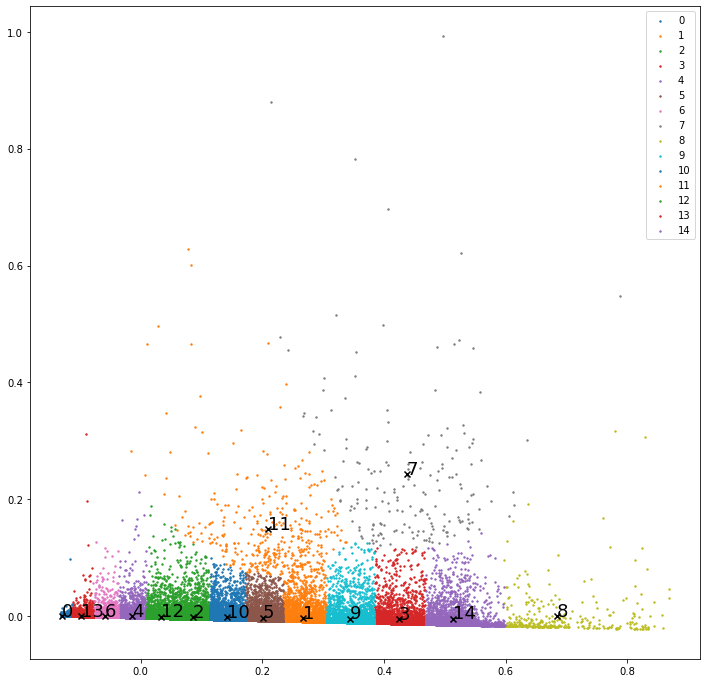

In [9]:
# use PCA to convert dimension to 2
pca = PCA(2)
data = pca.fit_transform(features_norm)

# fitting multiple k-means algorithms
k = 15
model = KMeans(n_clusters = k, init='k-means++')
model.fit(data)
pred = model.predict(data)
uniq = np.unique(pred)

centers = np.array(model.cluster_centers_)

# plot clusters
plt.figure(figsize=(12,12))

for i in uniq:
   plt.annotate(i, (centers[:,0][i], centers[:,1][i]), fontsize=18)
   plt.scatter(data[pred == i , 0], data[pred == i , 1], s = 2, label = i)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()

In [113]:
frame = features.copy()
frame['cluster'] = pred
print('Cluster counts')
print(frame['cluster'].value_counts())

Cluster counts
0     54283
13    15376
6     11172
4      8940
12     8295
2      7574
10     6615
5      6070
1      4969
9      4473
3      3402
14     2907
11      370
8       343
7       189
Name: cluster, dtype: int64


In [114]:
center = frame.groupby(['cluster']).mean()
center['cluster'] = uniq
center = center.sort_values(['followers_count','listed_count','post_count'], ascending=True)
# add ranking
center['rank'] = uniq + 1
# export json
center.to_json('center_location.json', orient='records', lines=True)

center

,followers_count,following_count,post_count,listed_count,active_date,cluster,rank
cluster,,,,,,,
0,8.748761,26.975572,11.185896,4.491277e-02,7.016580,0,1
13,34.394706,72.492651,115.541103,1.286420e-01,82.532193,13,2
6,51.666667,95.470283,261.887934,2.020229e-01,179.630147,6,3
4,79.943736,116.279978,470.664877,4.353465e+13,289.127531,4,4
12,110.956600,128.876914,651.989873,3.896323e-01,407.416154,12,5
2,144.671508,173.287299,876.837470,6.518352e-01,537.916029,2,6
10,146.934845,164.312320,1058.016780,8.613757e-01,674.412094,10,7
1,170.388609,198.657074,1383.053129,1.568927e+00,984.752868,1,8
5,171.298353,175.052059,1181.804942,1.031466e+00,820.854860,5,9


In [115]:
ranking = pd.DataFrame(columns=['cluster','rank'])
ranking['cluster'] = center['cluster']
ranking['rank'] = center['rank']
ranking = np.array(ranking)
ranking

array([[ 0,  1],
       [13,  2],
       [ 6,  3],
       [ 4,  4],
       [12,  5],
       [ 2,  6],
       [10,  7],
       [ 1,  8],
       [ 5,  9],
       [ 3, 10],
       [ 9, 11],
       [14, 12],
       [ 8, 13],
       [11, 14],
       [ 7, 15]], dtype=int32)

In [116]:
frame['rank'] = 0
for i in range(0,len(ranking)):
    frame['rank'].loc[frame['cluster'] == ranking[i][0]] = ranking[i][1]

/Users/hayden/opt/miniconda3/envs/pyspark_env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [117]:
frame.head(30)

,followers_count,following_count,post_count,listed_count,active_date,cluster,rank
0,4155.0,4395.0,12823.0,72.0,2470.0,8,13
1,438.0,757.0,515.0,9.0,2448.0,8,13
2,4295.0,4728.0,16282.0,166.0,2469.0,8,13
3,559.0,15.0,5991.0,25.0,2443.0,8,13
4,877.0,415.0,11320.0,42.0,2408.0,8,13
5,12.0,13.0,17.0,0.0,2140.0,8,13
6,95.0,431.0,597.0,0.0,2387.0,8,13
7,517.0,227.0,130.0,44.0,2387.0,8,13
8,137.0,97.0,1573.0,11.0,2409.0,8,13
9,4.0,9.0,212.0,0.0,2352.0,8,13


In [118]:
frame.to_csv('frame_with_ranking.csv')